Dataset : RedWine

Applying Agglomerative clustering to find pattern and the best value for the following features.

1. Use feautes fixed acidity and volatile acidity
2. Use feautes Cirtic acidity and fixed acidity
3. Use feautes residual suger and sulphades
4. Use feautes free.sulfur.dioxide and total.sulfur.dioxide
5. Use feautes fixed acidity, citric acidity and volatile acidity
5. Use feautes density and pH



In [1]:
from pyforest import *

In [4]:
data=pd.read_csv("windered2.csv")

In [5]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


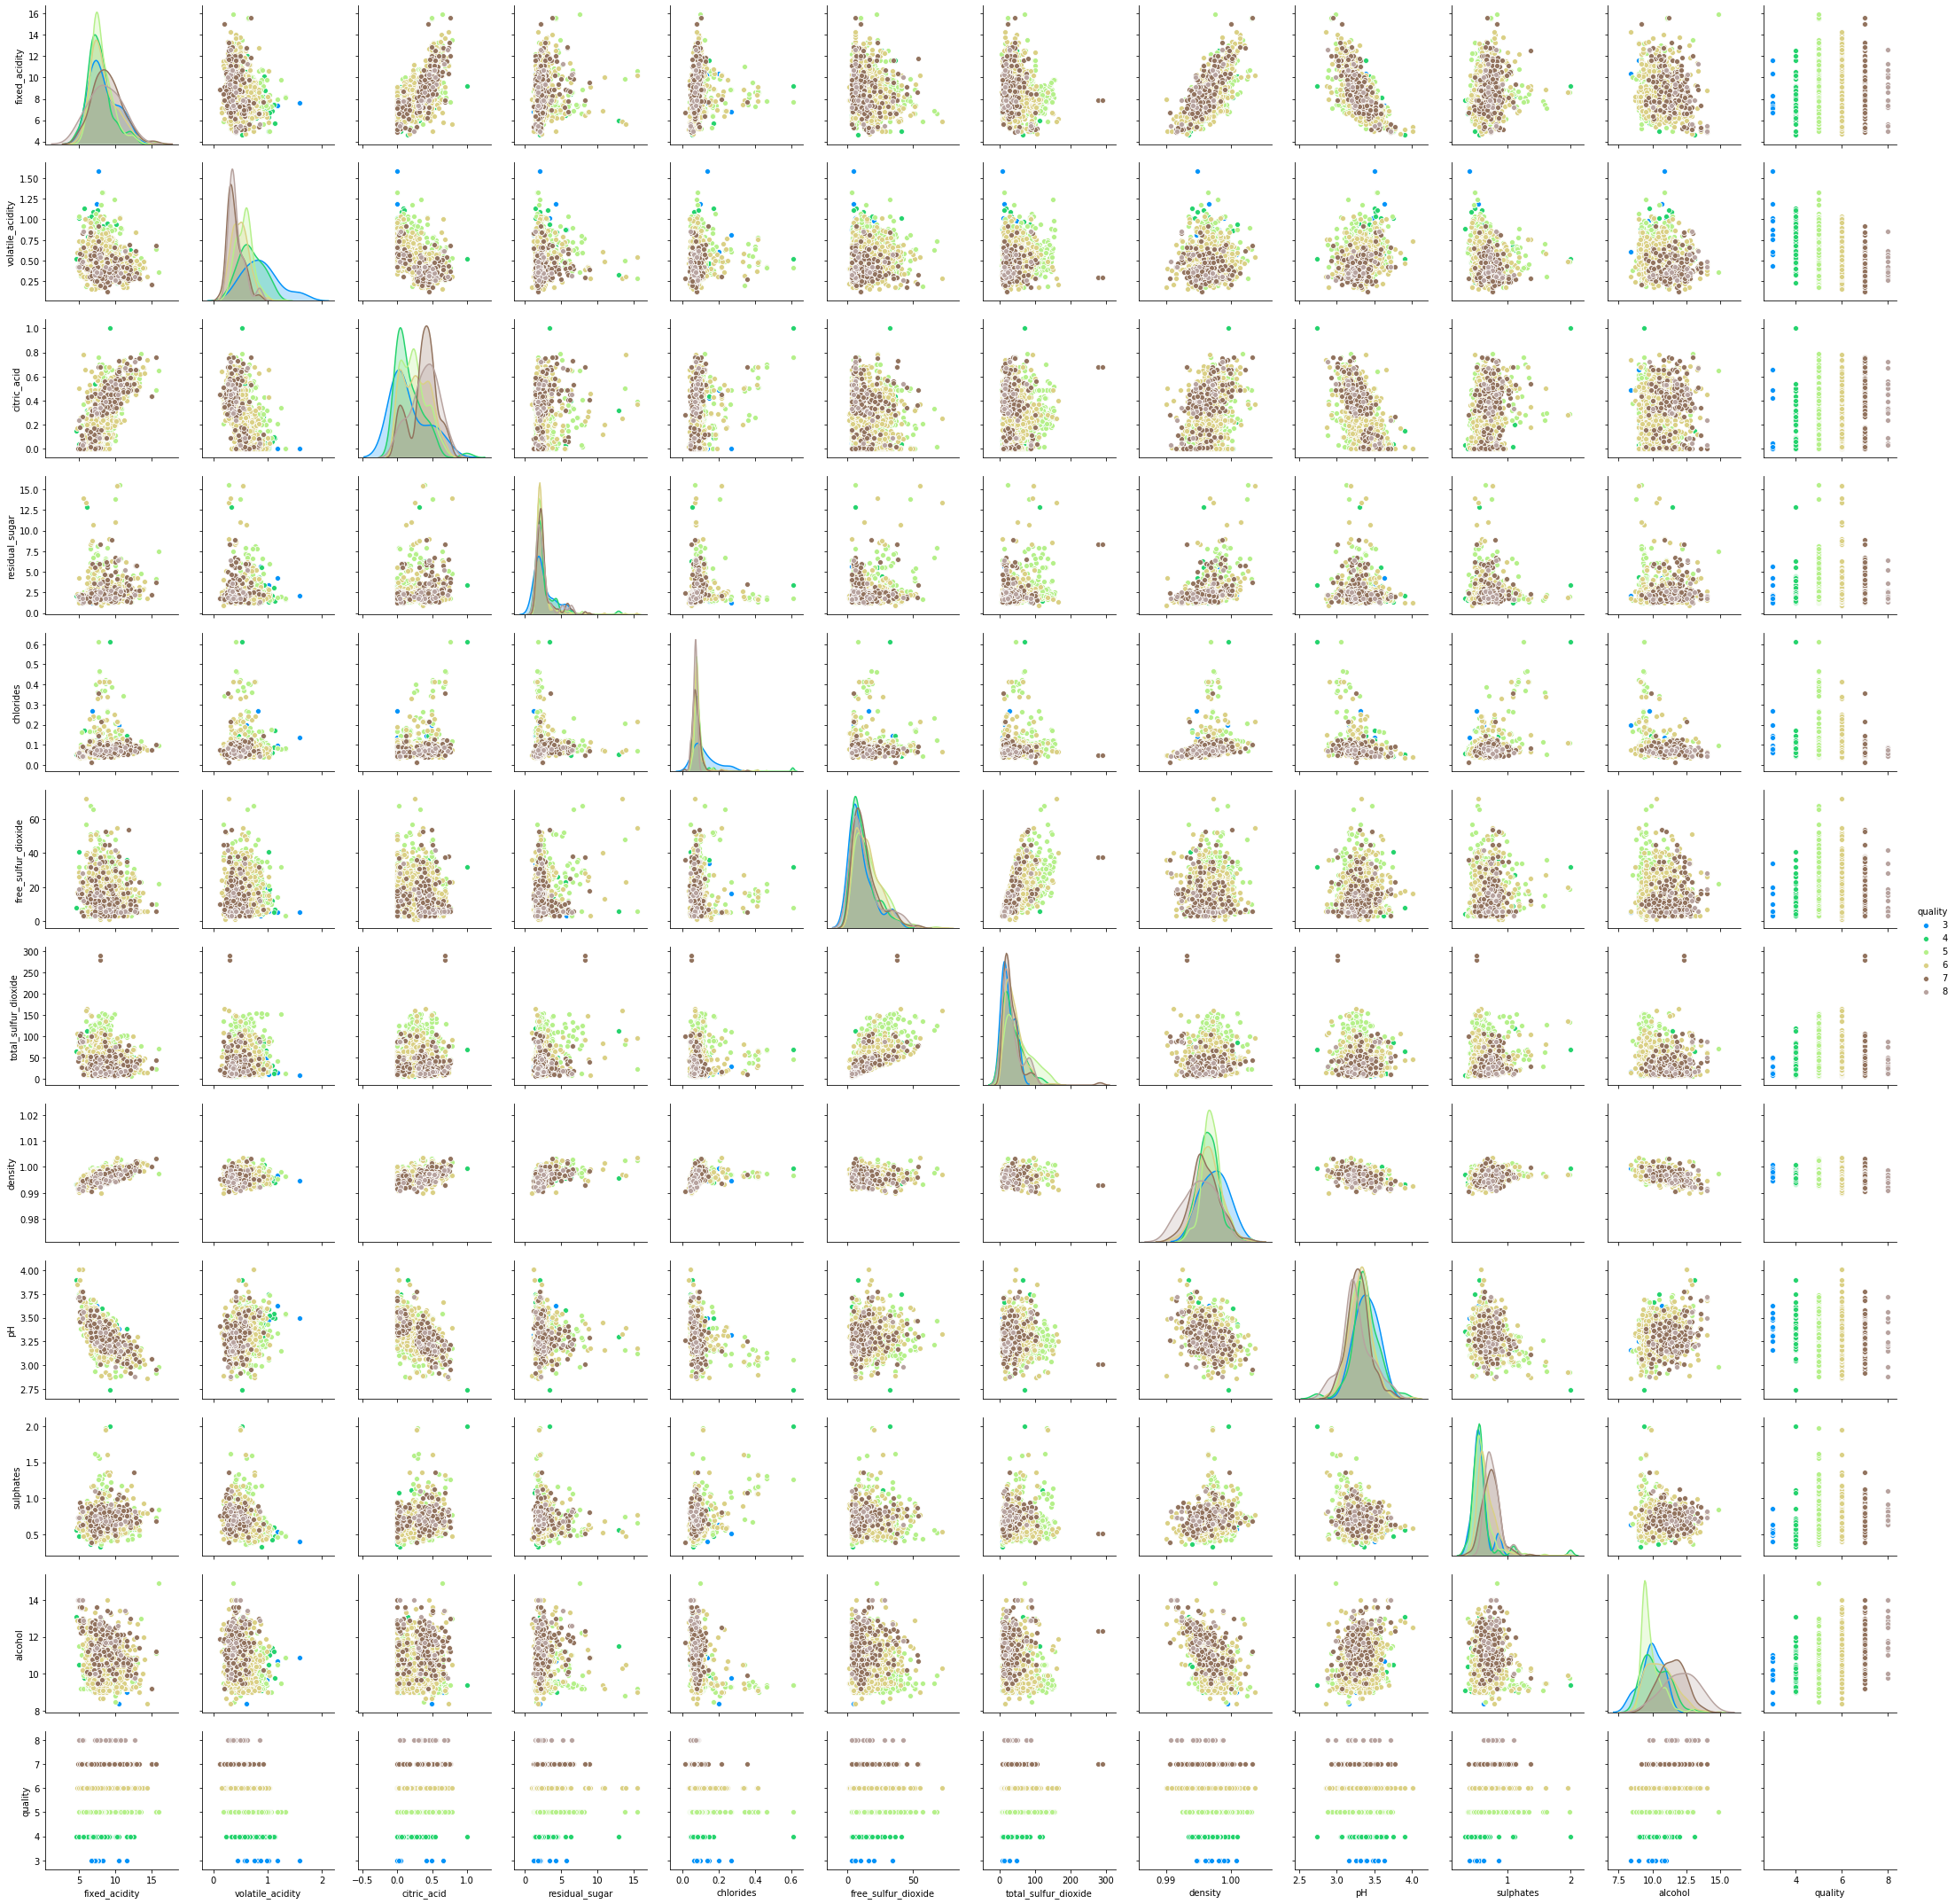

In [7]:
sns.pairplot(data,hue="quality")

In [9]:
X=data.drop(["quality"],axis=1)



    .Citric Acid
    .Alcohol
    .Density

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_data=pd.DataFrame(sc.fit_transform(X),columns=X.columns)

In [11]:
from sklearn.cluster import KMeans

In [14]:
cluster_inertia=[]
for i in range(1,15):
    model=KMeans(n_clusters=i)
    model.fit(scaled_data)
    cluster_inertia.append(model.inertia_)
    
"""
cluster_range=range(1,15)
cluster_inertia=[]
for num_clusters in cluster_range:
    model=KMeans( n_clusters=num_clusters)
    model.fit(scaled_data)
    cluster_inertia.append( model.inertia_)
    
    """

'\ncluster_range=range(1,15)\ncluster_inertia=[]\nfor num_clusters in cluster_range:\n    model=KMeans( n_clusters=num_clusters)\n    model.fit(scaled_data)\n    cluster_inertia.append( model.inertia_)\n    \n    '

In [15]:
cluster_inertia

[17589.0,
 14330.119811339398,
 12629.988316508694,
 11295.664258360735,
 10155.37402635511,
 9361.208633861428,
 8645.154948687803,
 8310.606385432196,
 7969.075354741867,
 7695.595997053739,
 7442.700175878063,
 7287.302156363683,
 7019.981349996614,
 6848.398362349714]

In [18]:
17589-14330

3259

In [19]:
14330-12629

1701

In [20]:
12629-11295

1334

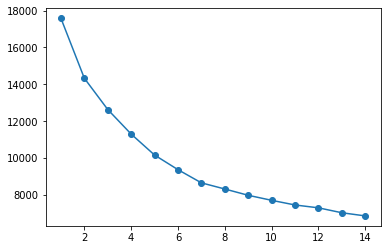

In [17]:
plt.plot(range(1,15),cluster_inertia,marker="o")

In [107]:
from sklearn.cluster import AgglomerativeClustering
m2=AgglomerativeClustering(n_clusters=3,affinity="cosine",linkage="complete")
m2.fit(scaled_data)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [108]:
L=pd.DataFrame(m2.labels_)
L[0].value_counts()
scaled_data["new class"]=m2.labels_

In [109]:
L[0].value_counts()

2    909
0    386
1    304
Name: 0, dtype: int64

In [110]:
AGC_clusters=scaled_data.groupby(["new class"])
df0=AGC_clusters.get_group(0)
df1=AGC_clusters.get_group(1)
df2=AGC_clusters.get_group(2)
df0.shape,df1.shape,df2.shape

((386, 12), (304, 12), (909, 12))

In [111]:
C0=np.array(df0.mean())
C1=np.array(df1.mean())
C2=np.array(df2.mean())

In [112]:
C0=C0[:-1]
C1=C1[:-1]
C2=C2[:-1]

In [113]:
C0


array([-0.65814991, -0.09948151, -0.37656897, -0.29349397, -0.35471058,
        0.15726558, -0.22259741, -1.08202181,  0.58834374,  0.03324526,
        1.00034729])

In [114]:
C1

array([ 1.25381871, -0.76561257,  1.20898945,  0.10969632, -0.07136976,
       -0.69237187, -0.6552141 ,  0.68523366, -0.75062461,  0.23532924,
        0.27968673])

In [115]:
C2

array([-0.13984051,  0.29829052, -0.24441933,  0.08794389,  0.17449361,
        0.16477066,  0.31364982,  0.23030735,  0.00119824, -0.09281931,
       -0.51832653])

In [116]:
AGC_I0=0
AGC_I1=0
AGC_I2=0
for i in np.arange(df0.shape[0]):
    AGC_I0=AGC_I0+np.sum((df0.iloc[i,:-1]-C0)**2)
for i in np.arange(df1.shape[0]):
    AGC_I1=AGC_I1+np.sum((df1.iloc[i,:-1]-C1)**2)
for i in np.arange(df2.shape[0]):
    AGC_I2=AGC_I2+np.sum((df2.iloc[i,:-1]-C2)**2)

In [117]:
AGC_I0,AGC_I1,AGC_I2

(2775.5630418260716, 1899.5925159629423, 9266.808354839317)

In [118]:
AGC_I0+AGC_I1+AGC_I2

13941.963912628331

In [120]:
data["quality"].unique()

array([5, 6, 7, 4, 8, 3])

As per the domain knowledge : 

        Wine Quality : 
                        3 : being worst
                        4,5,6 : being moderate
                        7 : being best
                       

Plotting Boxplots :

In [130]:
print(C0)
print(C1)
print(C2)

[-0.65814991 -0.09948151 -0.37656897 -0.29349397 -0.35471058  0.15726558
 -0.22259741 -1.08202181  0.58834374  0.03324526  1.00034729]
[ 1.25381871 -0.76561257  1.20898945  0.10969632 -0.07136976 -0.69237187
 -0.6552141   0.68523366 -0.75062461  0.23532924  0.27968673]
[-0.13984051  0.29829052 -0.24441933  0.08794389  0.17449361  0.16477066
  0.31364982  0.23030735  0.00119824 -0.09281931 -0.51832653]


In [121]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


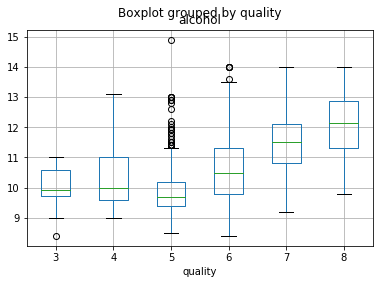

In [125]:
data.boxplot(column="alcohol",by="quality") #3 being worst alcohol and 8 being best

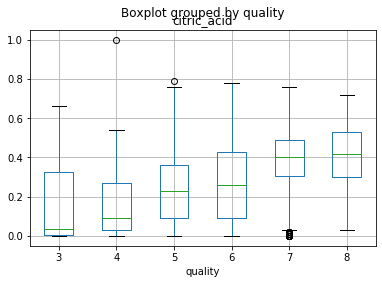

In [126]:
data.boxplot(column="citric_acid",by="quality") #8 being best and 3 being worst

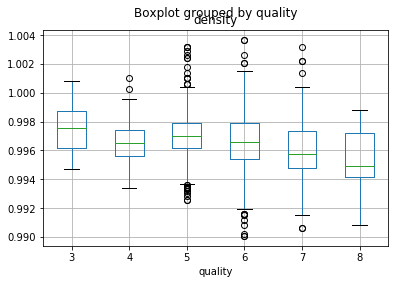

In [128]:
data.boxplot(column="density",by="quality") # 8 being less in density and 1 being high in density

    Quality         Density .      Citric Acid    Alcohol    CENTROID(CLASS)

    3                HIGH           LOW           LOW        0  
    4,5,6            MOD            MOD           MOD        2
    7                LOW            HIGH          HIGH       1

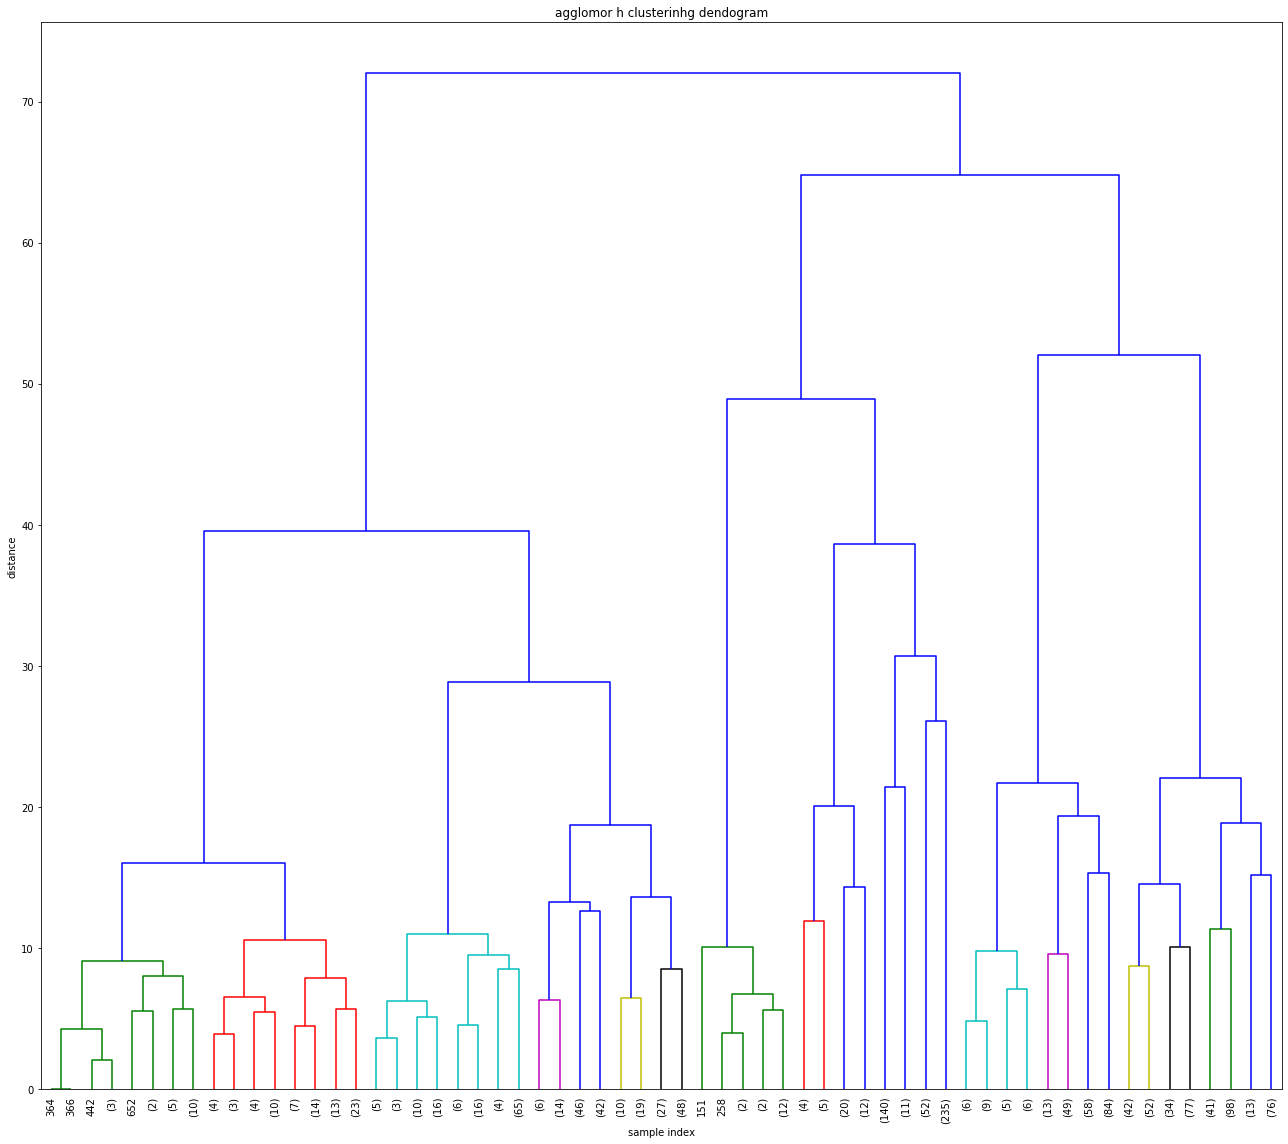

In [119]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18,16))
plt.title("agglomor h clusterinhg dendogram")
plt.xlabel("sample index")
plt.ylabel("distance")
Z=linkage(scaled_data,"ward")
dendrogram(Z,leaf_rotation=90.0,color_threshold=12,leaf_font_size=10,truncate_mode="level",p=5)
plt.tight_layout()

Final Conclusion :

    Quality         Density .      Citric Acid    Alcohol    CENTROID(CLASS)

    3                HIGH           LOW           LOW        0  
    4,5,6            MOD            MOD           MOD        2
    7                LOW            HIGH          HIGH       1